In [ ]:
import pandas as pd
import datetime as dt
import random

columnnames = ["DATE", "DELQ_ACCTS"]

movingdate = dt.date(2010, 1, 1)
delqaccts = 30
movingvalue = 0
def gennext(cur_delq, movval):
    if delqaccts <= 5:
        movval = random.randint(0, 3)
    elif delqaccts > 45:
        movval = random.randint(-3, 0)
    elif delqaccts < 30:
        movval += random.randint(-1, 2)
    elif delqaccts >= 30:
        movval += random.randint(-2, 1)

    cur_delq += movingvalue

    return max(cur_delq, 5), movval

df = pd.DataFrame(columns=columnnames)

for i in range(300):
    df.loc[len(df)] = (pd.to_datetime(movingdate), delqaccts/100)
    try:
        #try:
        #    movingdate = dt.date(movingdate.year, movingdate.month, movingdate.day+1)
        #except:
        movingdate = dt.date(movingdate.year, movingdate.month+1, 1)
    except:
        movingdate = dt.date(movingdate.year+1, 1, 1)
    delqaccts, movingvalue = gennext(delqaccts, movingvalue)

print(df)

df.to_csv(r"TS.csv")



          DATE  DELQ_ACCTS
0   2010-01-01        0.30
1   2010-02-01        0.30
2   2010-03-01        0.29
3   2010-04-01        0.29
4   2010-05-01        0.30
..         ...         ...
295 2034-08-01        0.45
296 2034-09-01        0.44
297 2034-10-01        0.43
298 2034-11-01        0.41
299 2034-12-01        0.40

[300 rows x 2 columns]


In [ ]:
!pip install autots

import pandas as pd

df =  pd.read_csv("TS.csv")
df['DATE'] = pd.to_datetime(df['DATE'])

from autots import AutoTS

PredictIntoFuture = 50

model = AutoTS(
    forecast_length=PredictIntoFuture,
    frequency='infer',
    ensemble='simple',
    max_generations=5,
    num_validations=2,
)
model = model.fit(df, date_col='DATE', value_col='DELQ_ACCTS', id_col=None)

# Print the description of the best model
print(model)
model.export_template("model.csv", models='best', n=15, max_per_model_class=PredictIntoFuture)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 672 kB 4.9 MB/s 
Inferred frequency is: MS
Model Number: 1 with model ARIMA in generation 0 of 5
Model Number: 2 with model ARIMA in generation 0 of 5
Model Number: 3 with model ARIMA in generation 0 of 5
Model Number: 4 with model AverageValueNaive in generation 0 of 5
Model Number: 5 with model AverageValueNaive in generation 0 of 5
Model Number: 6 with model AverageValueNaive in generation 0 of 5
Model Number: 7 with model DatepartRegression in generation 0 of 5
Model Number: 8 with model DatepartRegression in generation 0 of 5
Model Number: 9 with model DatepartRegression in generation 0 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 10 with model DatepartRegression in generation 0 of 5
Epoch 1/50
8/8 [==============================] - 7s 9ms/step - loss: 0.3178
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3180
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3150
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.3158
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3160
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3149
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3151
Epoch 8/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3148
Epoch 9/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3158
Epoch 10/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3140
Epoch 11/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3150
Epoch 12/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3129
Epoc

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 38 with model FBProphet in generation 0 of 5


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/zwzrqpj4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/vvqwrqj7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83575', 'data', 'file=/tmp/tmp8h9dqxpm/zwzrqpj4.json', 'init=/tmp/tmp8h9dqxpm/vvqwrqj7.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelyrxi_xg7/prophet_model-20221130075159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 39 with model GluonTS in generation 0 of 5
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 39: GluonTS
Model Number: 40 with model MultivariateRegression in generation 0 of 5


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 41 with model MultivariateRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 5
Model Number: 44 with model DatepartRegression in generation 0 of 5
Model Number: 45 with model UnobservedComponents in generation 0 of 5
Model Number: 46 with model UnobservedComponents in generation 0 of 5
Model Number: 47 with model ETS in generation 0 of 5
Model Number: 48 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 5
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/l

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/2xc0rj3w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/w1_4ghbh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58644', 'data', 'file=/tmp/tmp8h9dqxpm/2xc0rj3w.json', 'init=/tmp/tmp8h9dqxpm/w1_4ghbh.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modeler5qf8kt/prophet_model-20221130075205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 57 with model FBProphet in generation 0 of 5


07:52:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 58 with model SeasonalNaive in generation 0 of 5
Model Number: 59 with model DatepartRegression in generation 0 of 5


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 60 with model NVAR in generation 0 of 5
Model Number: 61 with model Theta in generation 0 of 5
Model Number: 62 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 62: UnivariateRegression
Model Number: 63 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 5
Model Number: 65 with model LastValueNaive in generation 0 of 5
Model Number: 66 with model AverageValueNaive in generation 0 of 5
Model Number: 67 with model GLS in generation 0 of 5
Model Number: 68 with model SeasonalNaive in generation 0 of 5
Model Number: 69 with model GLM in generation 0 of 5
Model Number: 70 with model ETS in generation 0 of 5
Model Number: 71 with model FBProphet in generation 0 of 5
No anomalies detected.


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/3rjpxqhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/1cty0diy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26491', 'data', 'file=/tmp/tmp8h9dqxpm/3rjpxqhy.json', 'init=/tmp/tmp8h9dqxpm/1cty0diy.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelrhaq6zv9/prophet_model-20221130075209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 72 with model GluonTS in generation 0 of 5
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 72: GluonTS
Model Number: 73 with model UnobservedComponents in generation 0 of 5
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 73: UnobservedComponents
Model Number: 74 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 74: VAR
Model Number: 75 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 75: VECM
Model Number: 76 with model ARIMA in generation 0 of 5
Model Number: 77 with model WindowRegression in generation 0 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


Model Number: 78 with model DatepartRegression in generation 0 of 5
Model Number: 79 with model UnivariateRegression in generation 0 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 80 with model MultivariateRegression in generation 0 of 5
Model Number: 81 with model UnivariateMotif in generation 0 of 5
Model Number: 82 with model MultivariateMotif in generation 0 of 5
Model Number: 83 with model SectionalMotif in generation 0 of 5
Model Number: 84 with model NVAR in generation 0 of 5
Model Number: 85 with model Theta in generation 0 of 5
Model Number: 86 with model ARDL in generation 0 of 5
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 86: ARDL
Model Number: 87 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 87: ARCH
Model Number: 88 with model MetricMotif in generation 0 of 5
Model Number: 89 with model SeasonalityMotif in generation 0 of 5
Model Number: 90 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ValueError("Input contains NaN

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 102 with model GluonTS in generation 0 of 5
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 102: GluonTS
Model Number: 103 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 103: ARDL
Model Number: 104 with model ConstantNaive in generation 0 of 5
Model Number: 105 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 105: VAR
Model Number: 106 with model GLS in generation 0 of 5
Model Number: 107 with model GLS in generation 0 of 5
Model Number: 108 with model MultivariateMotif in generation 0 of 5
Model Number: 109 with model AverageValueNaive in generation 0 of 5
Model Number: 110 with model SectionalMotif in generation 0 of 5
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 110: SectionalMotif
Model 

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 115 with model SeasonalityMotif in generation 0 of 5
Model Number: 116 with model WindowRegression in generation 0 of 5
Model Number: 117 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 117: ARCH
Model Number: 118 with model MetricMotif in generation 0 of 5
Model Number: 119 with model GLM in generation 0 of 5
Model Number: 120 with model GluonTS in generation 0 of 5
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 120: GluonTS
Model Number: 121 with model LastValueNaive in generation 0 of 5
Model Number: 122 with model UnobservedComponents in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 122: UnobservedComponents
Model Number: 123 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not sup

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.27007e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 141 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 141: ARCH
Model Number: 142 with model Theta in generation 0 of 5
Model Number: 143 with model Theta in generation 0 of 5
Model Number: 144 with model MultivariateRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 144: MultivariateRegression
Model Number: 145 with model UnivariateMotif in generation 0 of 5
Model Number: 146 with model Theta in generation 0 of 5
Model Number: 147 with model ETS in generation 0 of 5
Model Number: 148 with model MultivariateMotif in generation 0 of 5
Model Number: 149 with model ConstantNaive in generation 0 of 5
Model Number: 150 with model SeasonalNaive in generation 0 of 5
Model Number: 151 with model SectionalMotif in generation 0 of 5
Model Number: 152 with model GLM in generation 0 of 5
Model Number: 153 with model ARCH in gener

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 168 with model UnobservedComponents in generation 0 of 5
Model Number: 169 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 169: ARCH
Model Number: 170 with model UnivariateMotif in generation 0 of 5
Model Number: 171 with model AverageValueNaive in generation 0 of 5
Model Number: 172 with model ConstantNaive in generation 0 of 5
Model Number: 173 with model LastValueNaive in generation 0 of 5
Model Number: 174 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 174: UnivariateRegression
Model Number: 175 with model MetricMotif in generation 0 of 5
No anomalies detected.
Model Number: 176 with model MultivariateRegression in generation 0 of 5


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 176: MultivariateRegression
Model Number: 177 with model GLM in generation 0 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 177: GLM
Model Number: 178 with model ConstantNaive in generation 0 of 5


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.7s finished
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 179 with model MultivariateMotif in generation 0 of 5
Model Number: 180 with model SeasonalityMotif in generation 0 of 5
Model Number: 181 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 181: VECM
Model Number: 182 with model SeasonalityMotif in generation 0 of 5
Model Number: 183 with model SectionalMotif in generation 0 of 5
Model Number: 184 with model SeasonalNaive in generation 0 of 5
Model Number: 185 with model SectionalMotif in generation 0 of 5
Model Number: 186 with model SeasonalNaive in generation 0 of 5
Model Number: 187 with model SeasonalityMotif in generation 0 of 5
Model Number: 188 with model GLM in generation 0 of 5
Model Number: 189 with model UnobservedComponents in generation 0 of 5
Model Number: 190 with model SeasonalityMotif in generation 0 of 5
Model Number: 191 with model MultivariateMotif in generation 0 of 5
Model Number: 192 with model Theta in generation 0 of 5
Model Number: 193

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/e5elx3gh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/q9n15gjy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8660', 'data', 'file=/tmp/tmp8h9dqxpm/e5elx3gh.json', 'init=/tmp/tmp8h9dqxpm/q9n15gjy.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelm15bhuws/prophet_model-20221130075246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 216 with model FBProphet in generation 1 of 5
No anomalies detected.


07:52:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 217 with model LastValueNaive in generation 1 of 5
Model Number: 218 with model AverageValueNaive in generation 1 of 5
Model Number: 219 with model AverageValueNaive in generation 1 of 5
Model Number: 220 with model SectionalMotif in generation 1 of 5
Model Number: 221 with model SeasonalNaive in generation 1 of 5
Model Number: 222 with model LastValueNaive in generation 1 of 5
Model Number: 223 with model WindowRegression in generation 1 of 5


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 224 with model SeasonalNaive in generation 1 of 5
Model Number: 225 with model MultivariateMotif in generation 1 of 5
Model Number: 226 with model LastValueNaive in generation 1 of 5
Model Number: 227 with model MultivariateRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 227: MultivariateRegression
Model Number: 228 with model MultivariateMotif in generation 1 of 5
Model Number: 229 with model ARIMA in generation 1 of 5


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/f_07no01.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/snw4jqfp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75258', 'data', 'file=/tmp/tmp8h9dqxpm/f_07no01.json', 'init=/tmp/tmp8h9dqxpm/snw4jqfp.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modeljppq_lm2/prophet_model-20221130075256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 230 with model FBProphet in generation 1 of 5


07:52:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 231 with model GLS in generation 1 of 5
Model Number: 232 with model UnivariateRegression in generation 1 of 5
Model Number: 233 with model UnivariateMotif in generation 1 of 5
Model Number: 234 with model GLM in generation 1 of 5
Model Number: 235 with model DatepartRegression in generation 1 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 235: DatepartRegression
Model Number: 236 with model MetricMotif in generation 1 of 5
Model Number: 237 with model UnobservedComponents in generation 1 of 5
Model Number: 238 with model UnivariateRegression in generation 1 of 5
Model Number: 239 with model GLS in generation 1 of 5
Model Number: 240 with model MetricMotif in generation 1 of 5
Model Number: 241 with model LastValueNaive in generation 1 of 5
Model Number: 242 with model SeasonalNaive in generation 1 of 5
Model Number: 243 with model AverageValueNaive in generation 1 of 5
No anomalies detected.
Model Number: 244 with model WindowRegression

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Model Number: 247 with model AverageValueNaive in generation 1 of 5
Model Number: 248 with model NVAR in generation 1 of 5
Model Number: 249 with model SectionalMotif in generation 1 of 5


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 250 with model FBProphet in generation 1 of 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/hq0mf2kp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/pz1gz763.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69725', 'data', 'file=/tmp/tmp8h9dqxpm/hq0mf2kp.json', 'init=/tmp/tmp8h9dqxpm/pz1gz763.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelzt725dbt/prophet_model-20221130075300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 251 with model MultivariateMotif in generation 1 of 5
Model Number: 252 with model LastValueNaive in generation 1 of 5
Model Number: 253 with model DatepartRegression in generation 1 of 5
Model Number: 254 with model UnivariateMotif in generation 1 of 5
Model Number: 255 with model ARIMA in generation 1 of 5
Model Number: 256 with model UnivariateMotif in generation 1 of 5
Model Number: 257 with model UnobservedComponents in generation 1 of 5
Model Number: 258 with model MultivariateMotif in generation 1 of 5
Model Number: 259 with model NVAR in generation 1 of 5
Model Number: 260 with model MultivariateMotif in generation 1 of 5
Model Number: 261 with model GLM in generation 1 of 5
Model Number: 262 with model MultivariateMotif in generation 1 of 5
Model Number: 263 with model AverageValueNaive in generation 1 of 5
Model Number: 264 with model UnobservedComponents in generation 1 of 5
Template Eval Error: LinAlgError('Schur decomposition solver error.') in model 264: Uno

/usr/local/lib/python3.7/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 281 with model GLM in generation 1 of 5
Model Number: 282 with model UnobservedComponents in generation 1 of 5
Model Number: 283 with model LastValueNaive in generation 1 of 5
Model Number: 284 with model MetricMotif in generation 1 of 5
Model Number: 285 with model MultivariateMotif in generation 1 of 5
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 285: MultivariateMotif
Model Number: 286 with model GLS in generation 1 of 5
Model Number: 287 with model MetricMotif in generation 1 of 5
Model Number: 288 with model DatepartRegression in generation 1 of 5
Model Number: 289 with model Theta in generation 1 of 5
Model Number: 290 with model WindowRegression in generation 1 of 5
Model Number: 291 with model GLS in generation 1 of 5
Model Number: 292 with model SeasonalNaive in generation 1 of 5
Model Number: 293 with model ARIMA in generation 1 of 5
Model Number: 294 with model SectionalMotif 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 307 with model SectionalMotif in generation 1 of 5
Model Number: 308 with model Theta in generation 1 of 5
Model Number: 309 with model SeasonalityMotif in generation 1 of 5
Model Number: 310 with model SeasonalityMotif in generation 1 of 5
Model Number: 311 with model SectionalMotif in generation 1 of 5
Model Number: 312 with model SectionalMotif in generation 1 of 5
Model Number: 313 with model UnivariateMotif in generation 1 of 5
Model Number: 314 with model MetricMotif in generation 1 of 5
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 314: MetricMotif
Model Number: 315 with model SectionalMotif in generation 1 of 5
Model Number: 316 with model GLM in generation 1 of 5
Model Number: 317 with model DatepartRegression in generation 1 of 5
Epoch 1/50
32/32 [==============================] - 7s 8ms/step - loss: 0.4711
Epoch 2/50
32/32 [==============================] - 0s 7ms/step - loss: 0.4781
Epoch 3/50
32/32 [=======================

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 319 with model WindowRegression in generation 1 of 5
Model Number: 320 with model SeasonalityMotif in generation 1 of 5
Model Number: 321 with model GLS in generation 1 of 5
Model Number: 322 with model ARIMA in generation 1 of 5
Model Number: 323 with model SectionalMotif in generation 1 of 5
New Generation: 2 of 5
Model Number: 324 with model AverageValueNaive in generation 2 of 5
Model Number: 325 with model LastValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 325: LastValueNaive
Model Number: 326 with model AverageValueNaive in generation 2 of 5
Model Number: 327 with model AverageValueNaive in generation 2 of 5
Model Number: 328 with model GLM in generation 2 of 5
Model Number: 329 with model WindowRegression in generation 2 of 5
Model Number: 330 with model UnivariateMotif in generation 2 of 5
Model Number: 331 with model SectionalMotif in generation 2 of 5
Model Number: 332 with model ARIMA in generation 2 of

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 340 with model GLS in generation 2 of 5
Model Number: 341 with model WindowRegression in generation 2 of 5
Model Number: 342 with model ARIMA in generation 2 of 5
Model Number: 343 with model LastValueNaive in generation 2 of 5
Model Number: 344 with model MultivariateMotif in generation 2 of 5
Model Number: 345 with model LastValueNaive in generation 2 of 5
Model Number: 346 with model ConstantNaive in generation 2 of 5
Model Number: 347 with model ARIMA in generation 2 of 5
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 347: ARIMA
Model Number: 348 with model SeasonalNaive in generation 2 of 5
Model Number: 349 with model MultivariateMotif in generation 2 of 5
No anomalies detected.
Model Number: 350 with model LastValueNaive in generation 2 of 5
Model Number: 351 with model ARIMA in generation 2 of 5
Model Number: 352 with model MultivariateMotif in generation 2 of 5
Model Number: 353 with model UnobservedComponents in generation 2 of 5
Model

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Model Number: 360 with model ARIMA in generation 2 of 5
Model Number: 361 with model MetricMotif in generation 2 of 5
Model Number: 362 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 362: DatepartRegression
Model Number: 363 with model UnobservedComponents in generation 2 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 364 with model MultivariateMotif in generation 2 of 5
No anomalies detected.
Template Eval Error: ValueError('kth(=100) out of bounds (16)') in model 364: MultivariateMotif
Model Number: 365 with model UnivariateRegression in generation 2 of 5
Model Number: 366 with model UnobservedComponents in generation 2 of 5
Model Number: 367 with model SeasonalNaive in generation 2 of 5
Model Number: 368 with model MultivariateMotif in generation 2 of 5
Model Number: 369 with model UnivariateMotif in generation 2 of 5
Model Number: 370 with model SeasonalNaive in generation 2 of 5
Model Number: 371 with model SectionalMotif in generation 2 of 5
Model Number: 372 with model UnobservedComponents in generation 2 of 5
Model Number: 373 with model SectionalMotif in generation 2 of 5
Model Number: 374 with model DatepartRegression in generation 2 of 5
Model Number: 375 with model ARIMA in generation 2 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 376 with model SeasonalityMotif in generation 2 of 5
Model Number: 377 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 377: DatepartRegression
Model Number: 378 with model MultivariateRegression in generation 2 of 5
Model Number: 379 with model UnobservedComponents in generation 2 of 5
Model Number: 380 with model GLM in generation 2 of 5


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 381 with model MetricMotif in generation 2 of 5
Model Number: 382 with model WindowRegression in generation 2 of 5
Model Number: 383 with model LastValueNaive in generation 2 of 5
Model Number: 384 with model UnobservedComponents in generation 2 of 5
Model Number: 385 with model ETS in generation 2 of 5
Model Number: 386 with model UnivariateMotif in generation 2 of 5
Model Number: 387 with model SeasonalityMotif in generation 2 of 5
Model Number: 388 with model UnivariateMotif in generation 2 of 5
Model Number: 389 with model LastValueNaive in generation 2 of 5
Model Number: 390 with model AverageValueNaive in generation 2 of 5
Model Number: 391 with model MultivariateMotif in generation 2 of 5
Model Number: 392 with model GLS in generation 2 of 5
Model Number: 393 with model MultivariateRegression in generation 2 of 5


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/mvufzimy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/16wqwsq5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34376', 'data', 'file=/tmp/tmp8h9dqxpm/mvufzimy.json', 'init=/tmp/tmp8h9dqxpm/16wqwsq5.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelptntw4ig/prophet_model-20221130075552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 394 with model WindowRegression in generation 2 of 5
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 394: WindowRegression
Model Number: 395 with model FBProphet in generation 2 of 5


07:55:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 396 with model NVAR in generation 2 of 5
Model Number: 397 with model MultivariateMotif in generation 2 of 5
Model Number: 398 with model WindowRegression in generation 2 of 5
Model Number: 399 with model MetricMotif in generation 2 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Model Number: 400 with model GLS in generation 2 of 5
Model Number: 401 with model LastValueNaive in generation 2 of 5
Model Number: 402 with model DatepartRegression in generation 2 of 5
Model Number: 403 with model GLM in generation 2 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 404 with model MetricMotif in generation 2 of 5


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 405 with model FBProphet in generation 2 of 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/csvxt1wk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/i0hny9ou.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97834', 'data', 'file=/tmp/tmp8h9dqxpm/csvxt1wk.json', 'init=/tmp/tmp8h9dqxpm/i0hny9ou.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_model0_d97pmd/prophet_model-20221130075555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 406 with model UnivariateRegression in generation 2 of 5
Model Number: 407 with model UnobservedComponents in generation 2 of 5
Model Number: 408 with model UnivariateMotif in generation 2 of 5
Model Number: 409 with model UnivariateMotif in generation 2 of 5
Model Number: 410 with model MultivariateMotif in generation 2 of 5
Model Number: 411 with model WindowRegression in generation 2 of 5
Model Number: 412 with model LastValueNaive in generation 2 of 5
Model Number: 413 with model SectionalMotif in generation 2 of 5
Model Number: 414 with model MultivariateMotif in generation 2 of 5
Model Number: 415 with model WindowRegression in generation 2 of 5
Model Number: 416 with model MultivariateRegression in generation 2 of 5


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 417 with model ARIMA in generation 2 of 5
Model Number: 418 with model GLS in generation 2 of 5
Model Number: 419 with model SectionalMotif in generation 2 of 5


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/v_ahxi45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/t4x924_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97413', 'data', 'file=/tmp/tmp8h9dqxpm/v_ahxi45.json', 'init=/tmp/tmp8h9dqxpm/t4x924_a.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelf7dg1f3k/prophet_model-20221130075601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 420 with model FBProphet in generation 2 of 5
No anomalies detected.


07:56:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 421 with model SeasonalityMotif in generation 2 of 5
Model Number: 422 with model UnivariateMotif in generation 2 of 5
Model Number: 423 with model GLM in generation 2 of 5
Model Number: 424 with model ETS in generation 2 of 5
Model Number: 425 with model LastValueNaive in generation 2 of 5
Model Number: 426 with model MetricMotif in generation 2 of 5
Model Number: 427 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 427: DatepartRegression
Model Number: 428 with model ARIMA in generation 2 of 5
Model Number: 429 with model ConstantNaive in generation 2 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'linear', 'transformations': {'0': 'PositiveShift', '1': 'Slice', '2': 'AlignLastValue'}, 'transformation_params': {'0': {}, '1': {'method': 0.3}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'fir

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/alcuu6yz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/igepm9cn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77224', 'data', 'file=/tmp/tmp8h9dqxpm/alcuu6yz.json', 'init=/tmp

Model Number: 452 with model ARIMA in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 452: ARIMA
Model Number: 453 with model FBProphet in generation 2 of 5
No anomalies detected.


07:56:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


New Generation: 3 of 5
Model Number: 454 with model AverageValueNaive in generation 3 of 5
Model Number: 455 with model SectionalMotif in generation 3 of 5
Model Number: 456 with model UnivariateRegression in generation 3 of 5
Model Number: 457 with model MultivariateMotif in generation 3 of 5
Model Number: 458 with model LastValueNaive in generation 3 of 5
Model Number: 459 with model DatepartRegression in generation 3 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 460 with model SectionalMotif in generation 3 of 5
Model Number: 461 with model ARIMA in generation 3 of 5
Model Number: 462 with model Theta in generation 3 of 5
Model Number: 463 with model MultivariateMotif in generation 3 of 5
Model Number: 464 with model GLM in generation 3 of 5
Model Number: 465 with model SectionalMotif in generation 3 of 5
Model Number: 466 with model AverageValueNaive in generation 3 of 5
Model Number: 467 with model GLM in generation 3 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 467: GLM
Model Number: 468 with model UnivariateRegression in generation 3 of 5


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 469 with model MultivariateRegression in generation 3 of 5
Model Number: 470 with model WindowRegression in generation 3 of 5
Model Number: 471 with model ARIMA in generation 3 of 5
Model Number: 472 with model MetricMotif in generation 3 of 5
Model Number: 473 with model ARIMA in generation 3 of 5
Model Number: 474 with model UnivariateMotif in generation 3 of 5
Model Number: 475 with model SectionalMotif in generation 3 of 5
Model Number: 476 with model UnobservedComponents in generation 3 of 5
Model Number: 477 with model DatepartRegression in generation 3 of 5
Model Number: 478 with model LastValueNaive in generation 3 of 5
Model Number: 479 with model MetricMotif in generation 3 of 5
Model Number: 480 with model SeasonalityMotif in generation 3 of 5
Model Number: 481 with model MultivariateMotif in generation 3 of 5


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 482 with model FBProphet in generation 3 of 5
No anomalies detected.


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/9899thmo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/4mka_i36.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40653', 'data', 'file=/tmp/tmp8h9dqxpm/9899thmo.json', 'init=/tmp/tmp8h9dqxpm/4mka_i36.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modely11aslh8/prophet_model-20221130075735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 483 with model WindowRegression in generation 3 of 5
Model Number: 484 with model UnivariateRegression in generation 3 of 5
Model Number: 485 with model UnivariateRegression in generation 3 of 5
Model Number: 486 with model MetricMotif in generation 3 of 5
Model Number: 487 with model MetricMotif in generation 3 of 5
Model Number: 488 with model LastValueNaive in generation 3 of 5
Model Number: 489 with model LastValueNaive in generation 3 of 5
Model Number: 490 with model UnivariateMotif in generation 3 of 5
Model Number: 491 with model LastValueNaive in generation 3 of 5
Model Number: 492 with model GLS in generation 3 of 5
Model Number: 493 with model SectionalMotif in generation 3 of 5
Model Number: 494 with model GLM in generation 3 of 5
Model Number: 495 with model UnivariateRegression in generation 3 of 5
Model Number: 496 with model Theta in generation 3 of 5
Model Number: 497 with model WindowRegression in generation 3 of 5
Model Number: 498 with model LastValueN

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 517 with model FBProphet in generation 3 of 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/319m1epq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/1kdvhop3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3487', 'data', 'file=/tmp/tmp8h9dqxpm/319m1epq.json', 'init=/tmp/tmp8h9dqxpm/1kdvhop3.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelq901jqgo/prophet_model-20221130075822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 518 with model UnobservedComponents in generation 3 of 5
Model Number: 519 with model GLM in generation 3 of 5
Model Number: 520 with model LastValueNaive in generation 3 of 5
Model Number: 521 with model MetricMotif in generation 3 of 5
Model Number: 522 with model GLM in generation 3 of 5
Model Number: 523 with model MultivariateRegression in generation 3 of 5


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 524 with model LastValueNaive in generation 3 of 5
Model Number: 525 with model ARIMA in generation 3 of 5
Model Number: 526 with model MetricMotif in generation 3 of 5
Model Number: 527 with model MetricMotif in generation 3 of 5
Model Number: 528 with model NVAR in generation 3 of 5
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 528: NVAR
Model Number: 529 with model DatepartRegression in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 529: DatepartRegression
Model Number: 530 with model WindowRegression in generation 3 of 5
Model Number: 531 with model MultivariateMotif in generation 3 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Model Number: 532 with model DatepartRegression in generation 3 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 532: DatepartRegression
Model Number: 533 with model LastValueNaive in generation 3 of 5
Model Number: 534 with model MetricMotif in generation 3 of 5
Model Number: 535 with model Theta in generation 3 of 5
Model Number: 536 with model AverageValueNaive in generation 3 of 5
Model Number: 537 with model SectionalMotif in generation 3 of 5
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 537: SectionalMotif
Model Number: 538 with model MultivariateMotif in generation 3 of 5
Model Number: 539 with model MultivariateMotif in generation 3 of 5
Model Number: 540 with model MetricMotif in generation 3 of 5
Model Number: 541 with model SectionalMotif in generation 3 of 5
Model Number: 542 with model AverageValueNaive in generation 3 of 5
Model Number: 543 with model AverageValueNaive in generation 3 of 5
Model Nu

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 551 with model MultivariateMotif in generation 3 of 5
Model Number: 552 with model SeasonalityMotif in generation 3 of 5
Model Number: 553 with model MetricMotif in generation 3 of 5
Model Number: 554 with model SeasonalityMotif in generation 3 of 5
Model Number: 555 with model ETS in generation 3 of 5
Model Number: 556 with model MetricMotif in generation 3 of 5


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/vc1pirjo.json


Model Number: 557 with model FBProphet in generation 3 of 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/h7umfo8u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51532', 'data', 'file=/tmp/tmp8h9dqxpm/vc1pirjo.json', 'init=/tmp/tmp8h9dqxpm/h7umfo8u.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_model92jbq9cg/prophet_model-20221130075833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 558 with model UnivariateMotif in generation 3 of 5
Model Number: 559 with model SeasonalNaive in generation 3 of 5
Model Number: 560 with model MultivariateRegression in generation 3 of 5


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 561 with model DatepartRegression in generation 3 of 5
Epoch 1/50
32/32 [==============================] - 7s 8ms/step - loss: 0.4701
Epoch 2/50
32/32 [==============================] - 0s 8ms/step - loss: 0.4762
Epoch 3/50
32/32 [==============================] - 0s 7ms/step - loss: 0.4639
Epoch 4/50
32/32 [==============================] - 0s 8ms/step - loss: 0.4709
Epoch 5/50
32/32 [==============================] - 0s 8ms/step - loss: 0.4706
Epoch 6/50
32/32 [==============================] - 0s 8ms/step - loss: 0.4687
Epoch 7/50
32/32 [==============================] - 0s 7ms/step - loss: 0.4691
Epoch 8/50
32/32 [==============================] - 0s 8ms/step - loss: 0.4686
Epoch 9/50
32/32 [==============================] - 0s 8ms/step - loss: 0.4701
Epoch 10/50
32/32 [==============================] - 0s 8ms/step - loss: 0.4707
Epoch 11/50
32/32 [==============================] - 0s 7ms/step - loss: 0.4675
Epoch 12/50
32/32 [==============================] - 0s 8ms/

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 576 with model UnobservedComponents in generation 3 of 5
Model Number: 577 with model NVAR in generation 3 of 5
Model Number: 578 with model UnobservedComponents in generation 3 of 5
Model Number: 579 with model AverageValueNaive in generation 3 of 5


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/u1ei2i9d.json


Model Number: 580 with model FBProphet in generation 3 of 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/2lhz5j0d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89903', 'data', 'file=/tmp/tmp8h9dqxpm/u1ei2i9d.json', 'init=/tmp/tmp8h9dqxpm/2lhz5j0d.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelv70pbcb5/prophet_model-20221130075923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 581 with model UnivariateMotif in generation 3 of 5
Model Number: 582 with model AverageValueNaive in generation 3 of 5
Model Number: 583 with model MetricMotif in generation 3 of 5
New Generation: 4 of 5
Model Number: 584 with model UnivariateMotif in generation 4 of 5
Model Number: 585 with model SectionalMotif in generation 4 of 5
Model Number: 586 with model MultivariateMotif in generation 4 of 5
Model Number: 587 with model MetricMotif in generation 4 of 5
Model Number: 588 with model ETS in generation 4 of 5
Model Number: 589 with model MultivariateMotif in generation 4 of 5
Model Number: 590 with model WindowRegression in generation 4 of 5
Model Number: 591 with model UnivariateMotif in generation 4 of 5
Model Number: 592 with model UnivariateMotif in generation 4 of 5
Model Number: 593 with model MultivariateRegression in generation 4 of 5
Model Number: 594 with model WindowRegression in generation 4 of 5
Model Number: 595 with model AverageValueNaive in generatio

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 597 with model FBProphet in generation 4 of 5


07:59:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
07:59:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communication error on send
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/8m23uaif.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/cjitprm9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17241', 'data', 'file=/tmp/tmp8h9dqxpm/8m23uaif.json', 'init=/tmp/tmp8h9dqxpm/cjitprm9.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelg74gkiyc/prophet_model-20221130075931.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:59:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:31 - cmdstanpy - INFO - Chain [1] done processing
I

Model Number: 598 with model AverageValueNaive in generation 4 of 5
Model Number: 599 with model GLS in generation 4 of 5
Model Number: 600 with model ARIMA in generation 4 of 5
Model Number: 601 with model MultivariateRegression in generation 4 of 5
Model Number: 602 with model UnivariateRegression in generation 4 of 5
Model Number: 603 with model SeasonalityMotif in generation 4 of 5
Model Number: 604 with model UnivariateRegression in generation 4 of 5
Model Number: 605 with model MetricMotif in generation 4 of 5
Model Number: 606 with model GLM in generation 4 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 606: GLM
Model Number: 607 with model AverageValueNaive in generation 4 of 5
Model Number: 608 with model ARIMA in generation 4 of 5
Model Number: 609 with model MetricMotif in generation 4 of 5
Model Number: 610 with model SectionalMotif in generation 4 of 5
Model Number: 611 with model SectionalMotif in generation 4 of 5
Mod

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 623 with model UnivariateMotif in generation 4 of 5
Model Number: 624 with model UnivariateRegression in generation 4 of 5
Model Number: 625 with model ConstantNaive in generation 4 of 5
Model Number: 626 with model SeasonalNaive in generation 4 of 5
Model Number: 627 with model WindowRegression in generation 4 of 5
Model Number: 628 with model AverageValueNaive in generation 4 of 5
Model Number: 629 with model LastValueNaive in generation 4 of 5
Model Number: 630 with model MultivariateMotif in generation 4 of 5
Model Number: 631 with model SeasonalNaive in generation 4 of 5
Model Number: 632 with model MetricMotif in generation 4 of 5
Model Number: 633 with model ARIMA in generation 4 of 5
Model Number: 634 with model SectionalMotif in generation 4 of 5
Model Number: 635 with model ETS in generation 4 of 5
Model Number: 636 with model ARIMA in generation 4 of 5
Model Number: 637 with model MultivariateMotif in generation 4 of 5
Model Number: 638 with model MultivariateM

2/2 [==============================] - 1s 13ms/step
Model Number: 644 with model UnivariateRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 644: UnivariateRegression
Model Number: 645 with model WindowRegression in generation 4 of 5
Model Number: 646 with model MetricMotif in generation 4 of 5
Model Number: 647 with model LastValueNaive in generation 4 of 5
Model Number: 648 with model UnivariateMotif in generation 4 of 5
Model Number: 649 with model MultivariateMotif in generation 4 of 5
Model Number: 650 with model GLS in generation 4 of 5
Model Number: 651 with model NVAR in generation 4 of 5
Model Number: 652 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 652: DatepartRegression
Model Number: 653 with model SectionalMotif in generation 4 of 5
Model Number: 654 with model WindowRegression in generat

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 665 with model GLS in generation 4 of 5
Model Number: 666 with model ARIMA in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 666: ARIMA
Model Number: 667 with model MultivariateMotif in generation 4 of 5
Model Number: 668 with model MultivariateRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 668: MultivariateRegression
Model Number: 669 with model LastValueNaive in generation 4 of 5
Model Number: 670 with model MultivariateMotif in generation 4 of 5
Model Number: 671 with model SectionalMotif in generation 4 of 5
Model Number: 672 with model UnivariateMotif in generation 4 of 5
Model Number: 673 with model SectionalMotif in generation 4 of 5
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 673: SectionalMotif
Model Number: 674 with model UnobservedComponents in generation 4 of 5
Model Number:

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 677 with model DatepartRegression in generation 4 of 5


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 678 with model Theta in generation 4 of 5
Model Number: 679 with model GLM in generation 4 of 5


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 680 with model SectionalMotif in generation 4 of 5
Model Number: 681 with model WindowRegression in generation 4 of 5
Model Number: 682 with model LastValueNaive in generation 4 of 5
Model Number: 683 with model GLM in generation 4 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 683: GLM
Model Number: 684 with model MetricMotif in generation 4 of 5
Model Number: 685 with model GLM in generation 4 of 5
Model Number: 686 with model SeasonalNaive in generation 4 of 5
Model Number: 687 with model ARIMA in generation 4 of 5
Model Number: 688 with model UnivariateMotif in generation 4 of 5
Model Number: 689 with model UnivariateRegression in generation 4 of 5
Model Number: 690 with model AverageValueNaive in generation 4 of 5
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 690: AverageValueNaive
Model Number: 691 with model DatepartRegression in generation 4 of 5
Template Eval Error: Exception('Trans

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.27007e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/yecifv0v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/yxur8oh7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76642', 'data', 'file=/tmp/tmp8h9dqxpm/yecifv0v.json', 'init=/tmp/tmp8h9dqxpm/yxur8oh7.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modeliikxg26q/prophet_model-20221130080053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:53 - c

Model Number: 699 with model MultivariateRegression in generation 4 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 700 with model SectionalMotif in generation 4 of 5
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 700: SectionalMotif
Model Number: 701 with model SeasonalityMotif in generation 4 of 5
Model Number: 702 with model SectionalMotif in generation 4 of 5
Model Number: 703 with model MetricMotif in generation 4 of 5
Model Number: 704 with model AverageValueNaive in generation 4 of 5
Model Number: 705 with model LastValueNaive in generation 4 of 5
Model Number: 706 with model WindowRegression in generation 4 of 5
Model Number: 707 with model MultivariateMotif in generation 4 of 5
No anomalies detected.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.27007e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 708 with model MetricMotif in generation 4 of 5
Model Number: 709 with model MetricMotif in generation 4 of 5
Model Number: 710 with model GLM in generation 4 of 5
Model Number: 711 with model LastValueNaive in generation 4 of 5


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 712 with model GLS in generation 4 of 5
Model Number: 713 with model MultivariateRegression in generation 4 of 5
New Generation: 5 of 5
Model Number: 714 with model GLM in generation 5 of 5
Model Number: 715 with model MultivariateMotif in generation 5 of 5
Model Number: 716 with model Theta in generation 5 of 5
Model Number: 717 with model MultivariateMotif in generation 5 of 5
Model Number: 718 with model GLM in generation 5 of 5


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 719 with model GLS in generation 5 of 5
Model Number: 720 with model ARIMA in generation 5 of 5
Model Number: 721 with model SeasonalityMotif in generation 5 of 5
Model Number: 722 with model AverageValueNaive in generation 5 of 5
Model Number: 723 with model UnivariateMotif in generation 5 of 5
Model Number: 724 with model MetricMotif in generation 5 of 5
Model Number: 725 with model ARIMA in generation 5 of 5
Model Number: 726 with model UnobservedComponents in generation 5 of 5
Model Number: 727 with model GLM in generation 5 of 5
Model Number: 728 with model LastValueNaive in generation 5 of 5


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 729 with model UnobservedComponents in generation 5 of 5
Model Number: 730 with model SeasonalNaive in generation 5 of 5


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 731 with model FBProphet in generation 5 of 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/2qj_byyv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/4z73g6xo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83478', 'data', 'file=/tmp/tmp8h9dqxpm/2qj_byyv.json', 'init=/tmp/tmp8h9dqxpm/4z73g6xo.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelp3pvdg_p/prophet_model-20221130080203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:02:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:02:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 732 with model NVAR in generation 5 of 5
Model Number: 733 with model SeasonalNaive in generation 5 of 5
Model Number: 734 with model MultivariateMotif in generation 5 of 5
Model Number: 735 with model UnivariateRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 735: UnivariateRegression
Model Number: 736 with model LastValueNaive in generation 5 of 5


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 737 with model FBProphet in generation 5 of 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/w8xx3xuf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/g8n6eu3h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=635', 'data', 'file=/tmp/tmp8h9dqxpm/w8xx3xuf.json', 'init=/tmp/tmp8h9dqxpm/g8n6eu3h.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modeluyc6_kj5/prophet_model-20221130080205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:02:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:02:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 738 with model GLS in generation 5 of 5
Model Number: 739 with model GLM in generation 5 of 5
Model Number: 740 with model SeasonalityMotif in generation 5 of 5
Model Number: 741 with model MetricMotif in generation 5 of 5
Model Number: 742 with model AverageValueNaive in generation 5 of 5
Model Number: 743 with model UnivariateMotif in generation 5 of 5
Model Number: 744 with model MultivariateRegression in generation 5 of 5
Model Number: 745 with model UnivariateRegression in generation 5 of 5
Model Number: 746 with model MetricMotif in generation 5 of 5
Model Number: 747 with model AverageValueNaive in generation 5 of 5
Model Number: 748 with model WindowRegression in generation 5 of 5
Model Number: 749 with model SeasonalNaive in generation 5 of 5
Model Number: 750 with model UnivariateRegression in generation 5 of 5
Model Number: 751 with model WindowRegression in generation 5 of 5
Model Number: 752 with model ETS in generation 5 of 5
Model Number: 753 with model Win

2/2 [==============================] - 1s 13ms/step
Model Number: 759 with model LastValueNaive in generation 5 of 5
Model Number: 760 with model SectionalMotif in generation 5 of 5
Model Number: 761 with model LastValueNaive in generation 5 of 5
Model Number: 762 with model SectionalMotif in generation 5 of 5
Model Number: 763 with model WindowRegression in generation 5 of 5
Epoch 1/50
3/3 [==============================] - 6s 52ms/step - loss: 3.3187
Epoch 2/50
3/3 [==============================] - 0s 48ms/step - loss: 0.6142
Epoch 3/50
3/3 [==============================] - 0s 49ms/step - loss: 0.8491
Epoch 4/50
3/3 [==============================] - 0s 54ms/step - loss: 0.1677
Epoch 5/50
3/3 [==============================] - 0s 56ms/step - loss: 0.0673
Epoch 6/50
3/3 [==============================] - 0s 51ms/step - loss: 0.0253
Epoch 7/50
3/3 [==============================] - 0s 52ms/step - loss: 0.0087
Epoch 8/50
3/3 [==============================] - 0s 52ms/step - loss: 0.00

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 768 with model MultivariateMotif in generation 5 of 5
Model Number: 769 with model ARIMA in generation 5 of 5
Model Number: 770 with model MetricMotif in generation 5 of 5
Model Number: 771 with model GLM in generation 5 of 5
Model Number: 772 with model UnivariateRegression in generation 5 of 5
Model Number: 773 with model SectionalMotif in generation 5 of 5
Model Number: 774 with model MetricMotif in generation 5 of 5
Model Number: 775 with model AverageValueNaive in generation 5 of 5
Model Number: 776 with model AverageValueNaive in generation 5 of 5
Model Number: 777 with model SeasonalityMotif in generation 5 of 5
Model Number: 778 with model MultivariateRegression in generation 5 of 5


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 779 with model SeasonalityMotif in generation 5 of 5


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 780 with model ARIMA in generation 5 of 5
Model Number: 781 with model WindowRegression in generation 5 of 5
Model Number: 782 with model Theta in generation 5 of 5
Model Number: 783 with model SectionalMotif in generation 5 of 5
Model Number: 784 with model WindowRegression in generation 5 of 5
Model Number: 785 with model WindowRegression in generation 5 of 5


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 786 with model AverageValueNaive in generation 5 of 5
Model Number: 787 with model AverageValueNaive in generation 5 of 5


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/xdgd5a0k.json


Model Number: 788 with model FBProphet in generation 5 of 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/_0tcjyu9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62432', 'data', 'file=/tmp/tmp8h9dqxpm/xdgd5a0k.json', 'init=/tmp/tmp8h9dqxpm/_0tcjyu9.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelrpjw6s58/prophet_model-20221130080358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:03:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 789 with model SeasonalNaive in generation 5 of 5
Model Number: 790 with model MultivariateMotif in generation 5 of 5
Model Number: 791 with model Theta in generation 5 of 5
Model Number: 792 with model UnivariateMotif in generation 5 of 5
Model Number: 793 with model UnivariateMotif in generation 5 of 5
Model Number: 794 with model WindowRegression in generation 5 of 5
Model Number: 795 with model SectionalMotif in generation 5 of 5
Model Number: 796 with model WindowRegression in generation 5 of 5
Model Number: 797 with model NVAR in generation 5 of 5
Model Number: 798 with model SectionalMotif in generation 5 of 5
Model Number: 799 with model UnivariateMotif in generation 5 of 5
Model Number: 800 with model SectionalMotif in generation 5 of 5
Model Number: 801 with model MultivariateMotif in generation 5 of 5
Model Number: 802 with model UnivariateMotif in generation 5 of 5
Model Number: 803 with model SeasonalNaive in generation 5 of 5
Model Number: 804 with model Ave

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 809 with model SectionalMotif in generation 5 of 5
Model Number: 810 with model SectionalMotif in generation 5 of 5
Model Number: 811 with model GLS in generation 5 of 5
Model Number: 812 with model MultivariateMotif in generation 5 of 5
Model Number: 813 with model WindowRegression in generation 5 of 5
Model Number: 814 with model MetricMotif in generation 5 of 5
Model Number: 815 with model LastValueNaive in generation 5 of 5
Model Number: 816 with model FBProphet in generation 5 of 5


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/ot_vm26v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/eno4wreq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26678', 'data', 'file=/tmp/tmp8h9dqxpm/ot_vm26v.json', 'init=/tmp/tmp8h9dqxpm/eno4wreq.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_model_2mt4rpt/prophet_model-20221130080406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 817 with model SectionalMotif in generation 5 of 5
Model Number: 818 with model Ensemble in generation 6 of Ensembles
Model Number: 819 with model Ensemble in generation 6 of Ensembles
Model Number: 820 with model Ensemble in generation 6 of Ensembles
Model Number: 821 with model Ensemble in generation 6 of Ensembles
Model Number: 822 with model Ensemble in generation 6 of Ensembles
Model Number: 823 with model Ensemble in generation 6 of Ensembles
Model Number: 824 with model Ensemble in generation 6 of Ensembles
Model Number: 825 with model Ensemble in generation 6 of Ensembles
Validation Round: 1
Model Number: 1 of 124 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 46.91: 
Model Number: 2 of 124 with model Ensemble for Validation 1
📈 2 - Ensemble with avg smape 43.6: 
Model Number: 3 of 124 with model Ensemble for Validation 1
3 - Ensemble with avg smape 60.55: 
Model Number: 4 of 124 with model Ensemble for Validation 1
4 - Ensemble with avg smape 

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


📈 41 - GLM with avg smape 36.42: 
Model Number: 42 of 124 with model AverageValueNaive for Validation 1
42 - AverageValueNaive with avg smape 36.77: 
Model Number: 43 of 124 with model LastValueNaive for Validation 1
43 - LastValueNaive with avg smape 42.01: 
Model Number: 44 of 124 with model LastValueNaive for Validation 1
44 - LastValueNaive with avg smape 42.01: 
Model Number: 45 of 124 with model AverageValueNaive for Validation 1
45 - AverageValueNaive with avg smape 36.59: 
Model Number: 46 of 124 with model SeasonalNaive for Validation 1
📈 46 - SeasonalNaive with avg smape 36.06: 
Model Number: 47 of 124 with model GLM for Validation 1
47 - GLM with avg smape 39.79: 


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 48 of 124 with model SeasonalNaive for Validation 1
48 - SeasonalNaive with avg smape 36.51: 
Model Number: 49 of 124 with model GLM for Validation 1
49 - GLM with avg smape 37.66: 
Model Number: 50 of 124 with model GLM for Validation 1
50 - GLM with avg smape 37.66: 
Model Number: 51 of 124 with model SeasonalNaive for Validation 1
51 - SeasonalNaive with avg smape 36.5: 
Model Number: 52 of 124 with model UnivariateRegression for Validation 1
52 - UnivariateRegression with avg smape 42.61: 
Model Number: 53 of 124 with model LastValueNaive for Validation 1
53 - LastValueNaive with avg smape 42.44: 
Model Number: 54 of 124 with model LastValueNaive for Validation 1
54 - LastValueNaive with avg smape 38.73: 
Model Number: 55 of 124 with model UnivariateMotif for Validation 1
55 - UnivariateMotif with avg smape 52.82: 
Model Number: 56 of 124 with model LastValueNaive for Validation 1
56 - LastValueNaive with avg smape 42.31: 
Model Number: 57 of 124 with model LastValueN

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

81 - MultivariateRegression with avg smape 67.56: 
Model Number: 82 of 124 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

82 - MultivariateRegression with avg smape 71.39: 
Model Number: 83 of 124 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

83 - MultivariateRegression with avg smape 50.37: 
Model Number: 84 of 124 with model GLS for Validation 1
84 - GLS with avg smape 60.45: 
Model Number: 85 of 124 with model GLS for Validation 1
85 - GLS with avg smape 60.45: 
Model Number: 86 of 124 with model MultivariateRegression for Validation 1
86 - MultivariateRegression with avg smape 57.86: 
Model Number: 87 of 124 with model SeasonalityMotif for Validation 1
87 - SeasonalityMotif with avg smape 65.54: 
Model Number: 88 of 124 with model SeasonalityMotif for Validation 1
88 - SeasonalityMotif with avg smape 65.54: 
Model Number: 89 of 124 with model GLS for Validation 1
89 - GLS with avg smape 60.0: 
Model Number: 90 of 124 with model GLS for Validation 1
90 - GLS with avg smape 60.0: 
Model Number: 91 of 124 with model UnobservedComponents for Validation 1
91 - UnobservedComponents with avg smape 58.09: 
Model Number: 92 of 124 with model UnobservedComponents for Validation 1
92 - UnobservedComponents with avg smape 58.13: 
M

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


96 - DatepartRegression with avg smape 57.9: 
Model Number: 97 of 124 with model DatepartRegression for Validation 1
Epoch 1/50
25/25 [==============================] - 5s 6ms/step - loss: 0.4678
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4660
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4672
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4595
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4597
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4633
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4662
Epoch 8/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4648
Epoch 9/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4641
Epoch 10/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4651
Epoch 11/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4606
Epoch 12/50


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/khj2pt53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/kiigg5pw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76825', 'data', 'file=/tmp/tmp8h9dqxpm/khj2pt53.json', 'init=/tmp/tmp8h9dqxpm/kiigg5pw.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelu2gxsqf4/prophet_model-20221130080608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


08:06:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


102 - FBProphet with avg smape 57.11: 
Model Number: 103 of 124 with model DatepartRegression for Validation 1
Epoch 1/50
25/25 [==============================] - 5s 6ms/step - loss: 0.0900
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0178
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0183
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0140
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0154
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0142
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0124
Epoch 8/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0135
Epoch 9/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0125
Epoch 10/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0118
Epoch 11/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0104
Epoch 12/50
25/25 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/hjpgh2qy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/j28povw0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47285', 'data', 'file=/tmp/tmp8h9dqxpm/hjpgh2qy.json', 'init=/tmp/tmp8h9dqxpm/j28povw0.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelho6c8nks/prophet_model-20221130080626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Model Number: 105 of 124 with model FBProphet for Validation 1


08:06:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


105 - FBProphet with avg smape 57.4: 
Model Number: 106 of 124 with model DatepartRegression for Validation 1
106 - DatepartRegression with avg smape 58.94: 
Model Number: 107 of 124 with model FBProphet for Validation 1


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/g8vvz2v9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/hu61bq1r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48214', 'data', 'file=/tmp/tmp8h9dqxpm/g8vvz2v9.json', 'init=/tmp/tmp8h9dqxpm/hu61bq1r.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelnxfg94c3/prophet_model-20221130080627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

107 - FBProphet with avg smape 57.85: 
Model Number: 108 of 124 with model FBProphet for Validation 1
No anomalies detected.


08:06:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/xhbxyioj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/xzcc8c_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47295', 'data', 'file=/tmp/tmp8h9dqxpm/xhbxyioj.json', 'init=/tmp/tmp8h9dqxpm/xzcc8c_g.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_model42s9tq3c/prophet_model-20221130080629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


108 - FBProphet with avg smape 57.26: 
Model Number: 109 of 124 with model FBProphet for Validation 1


08:06:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/q46qed84.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/oc8fh8q6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57776', 'data', 'file=/tmp/tmp8h9dqxpm/q46qed84.json', 'init=/tmp/tmp8h9dqxpm/oc8fh8q6.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_model76f1ok2e/prophet_model-20221130080630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


109 - FBProphet with avg smape 57.41: 
Model Number: 110 of 124 with model FBProphet for Validation 1
No anomalies detected.


08:06:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


110 - FBProphet with avg smape 68.21: 
Model Number: 111 of 124 with model ETS for Validation 1
111 - ETS with avg smape 69.73: 
Model Number: 112 of 124 with model ETS for Validation 1
112 - ETS with avg smape 69.73: 
Model Number: 113 of 124 with model Theta for Validation 1
113 - Theta with avg smape 72.87: 
Model Number: 114 of 124 with model Theta for Validation 1
114 - Theta with avg smape 71.48: 
Model Number: 115 of 124 with model Theta for Validation 1
115 - Theta with avg smape 71.13: 
Model Number: 116 of 124 with model Theta for Validation 1
116 - Theta with avg smape 69.4: 
Model Number: 117 of 124 with model Theta for Validation 1
117 - Theta with avg smape 74.8: 
Model Number: 118 of 124 with model Theta for Validation 1
118 - Theta with avg smape 69.39: 
Model Number: 119 of 124 with model NVAR for Validation 1
119 - NVAR with avg smape 63.56: 
Model Number: 120 of 124 with model NVAR for Validation 1
120 - NVAR with avg smape 59.42: 
Model Number: 121 of 124 with model

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


41 - GLM with avg smape 75.94: 
Model Number: 42 of 124 with model AverageValueNaive for Validation 2
42 - AverageValueNaive with avg smape 77.32: 
Model Number: 43 of 124 with model LastValueNaive for Validation 2
43 - LastValueNaive with avg smape 121.85: 
Model Number: 44 of 124 with model LastValueNaive for Validation 2
44 - LastValueNaive with avg smape 121.85: 
Model Number: 45 of 124 with model AverageValueNaive for Validation 2
45 - AverageValueNaive with avg smape 77.99: 
Model Number: 46 of 124 with model SeasonalNaive for Validation 2
46 - SeasonalNaive with avg smape 72.88: 
Model Number: 47 of 124 with model GLM for Validation 2
47 - GLM with avg smape 86.05: 
Model Number: 48 of 124 with model SeasonalNaive for Validation 2

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)



48 - SeasonalNaive with avg smape 78.04: 
Model Number: 49 of 124 with model GLM for Validation 2
49 - GLM with avg smape 76.85: 
Model Number: 50 of 124 with model GLM for Validation 2
50 - GLM with avg smape 76.85: 
Model Number: 51 of 124 with model SeasonalNaive for Validation 2
51 - SeasonalNaive with avg smape 77.67: 
Model Number: 52 of 124 with model UnivariateRegression for Validation 2
52 - UnivariateRegression with avg smape 60.12: 
Model Number: 53 of 124 with model LastValueNaive for Validation 2
53 - LastValueNaive with avg smape 119.14: 
Model Number: 54 of 124 with model LastValueNaive for Validation 2
54 - LastValueNaive with avg smape 134.29: 
Model Number: 55 of 124 with model UnivariateMotif for Validation 2
55 - UnivariateMotif with avg smape 70.14: 
Model Number: 56 of 124 with model LastValueNaive for Validation 2
56 - LastValueNaive with avg smape 131.38: 
Model Number: 57 of 124 with model LastValueNaive for Validation 2
57 - LastValueNaive with avg smape 131.

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

81 - MultivariateRegression with avg smape 54.53: 
Model Number: 82 of 124 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

82 - MultivariateRegression with avg smape 50.42: 
Model Number: 83 of 124 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: U

83 - MultivariateRegression with avg smape 44.0: 
Model Number: 84 of 124 with model GLS for Validation 2
84 - GLS with avg smape 59.17: 
Model Number: 85 of 124 with model GLS for Validation 2
85 - GLS with avg smape 59.17: 
Model Number: 86 of 124 with model MultivariateRegression for Validation 2
86 - MultivariateRegression with avg smape 51.65: 
Model Number: 87 of 124 with model SeasonalityMotif for Validation 2
87 - SeasonalityMotif with avg smape 60.82: 
Model Number: 88 of 124 with model SeasonalityMotif for Validation 2
88 - SeasonalityMotif with avg smape 60.82: 
Model Number: 89 of 124 with model GLS for Validation 2
89 - GLS with avg smape 59.09: 
Model Number: 90 of 124 with model GLS for Validation 2
90 - GLS with avg smape 59.09: 
Model Number: 91 of 124 with model UnobservedComponents for Validation 2
91 - UnobservedComponents with avg smape 55.6: 
Model Number: 92 of 124 with model UnobservedComponents for Validation 2
92 - UnobservedComponents with avg smape 58.95: 
M

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Epoch 1/50
19/19 [==============================] - 7s 7ms/step - loss: 0.4548
Epoch 2/50
19/19 [==============================] - 0s 8ms/step - loss: 0.4631
Epoch 3/50
19/19 [==============================] - 0s 8ms/step - loss: 0.4572
Epoch 4/50
19/19 [==============================] - 0s 7ms/step - loss: 0.4517
Epoch 5/50
19/19 [==============================] - 0s 9ms/step - loss: 0.4595
Epoch 6/50
19/19 [==============================] - 0s 8ms/step - loss: 0.4615
Epoch 7/50
19/19 [==============================] - 0s 8ms/step - loss: 0.4553
Epoch 8/50
19/19 [==============================] - 0s 8ms/step - loss: 0.4578
Epoch 9/50
19/19 [==============================] - 0s 7ms/step - loss: 0.4539
Epoch 10/50
19/19 [==============================] - 0s 8ms/step - loss: 0.4585
Epoch 11/50
19/19 [==============================] - 0s 8ms/step - loss: 0.4584
Epoch 12/50
19/19 [==============================] - 0s 8ms/step - loss: 0.4546
Epoch 13/50
19/19 [==============================

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/mis3_tzf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/s9uhm0lb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99969', 'data', 'file=/tmp/tmp8h9dqxpm/mis3_tzf.json', 'init=/tmp/tmp8h9dqxpm/s9uhm0lb.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelznbkrv9m/prophet_model-20221130080820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:08:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 102 of 124 with model FBProphet for Validation 2


08:08:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


102 - FBProphet with avg smape 91.77: 
Model Number: 103 of 124 with model DatepartRegression for Validation 2
Epoch 1/50
19/19 [==============================] - 8s 9ms/step - loss: 0.1173
Epoch 2/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0154
Epoch 3/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0169
Epoch 4/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 5/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 6/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 7/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 8/50
19/19 [==============================] - 0s 11ms/step - loss: 0.0127
Epoch 9/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 10/50
19/19 [==============================] - 0s 11ms/step - loss: 0.0109
Epoch 11/50
19/19 [==============================] - 0s 11ms/step - loss: 0.0119
Epoch 12/5

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/i1vrddjd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/ps5jc2lv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75583', 'data', 'file=/tmp/tmp8h9dqxpm/i1vrddjd.json', 'init=/tmp/tmp8h9dqxpm/ps5jc2lv.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_model2qam5gx8/prophet_model-20221130080841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:08:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

104 - DatepartRegression with avg smape 58.96: 
Model Number: 105 of 124 with model FBProphet for Validation 2


08:08:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


105 - FBProphet with avg smape 108.06: 
Model Number: 106 of 124 with model DatepartRegression for Validation 2
106 - DatepartRegression with avg smape 59.79: 


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/viqxv_sp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/54ofjc6j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72206', 'data', 'file=/tmp/tmp8h9dqxpm/viqxv_sp.json', 'init=/tmp/tmp8h9dqxpm/54ofjc6j.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_models0qdaew3/prophet_model-20221130080842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:08:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 107 of 124 with model FBProphet for Validation 2


08:08:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/ya7qmd4k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/_tgmikwv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43373', 'data', 'file=/tmp/tmp8h9dqxpm/ya7qmd4k.json', 'init=/tmp/tmp8h9dqxpm/_tgmikwv.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modeleacen6zf/prophet_model-20221130080843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:08:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


107 - FBProphet with avg smape 59.64: 
Model Number: 108 of 124 with model FBProphet for Validation 2
No anomalies detected.


08:08:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/y4s158yd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/86i8gtls.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13472', 'data', 'file=/tmp/tmp8h9dqxpm/y4s158yd.json', 'init=/tmp/tmp8h9dqxpm/86i8gtls.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelrunq_66q/prophet_model-20221130080845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:08:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


108 - FBProphet with avg smape 59.36: 
Model Number: 109 of 124 with model FBProphet for Validation 2


08:08:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/s3nvu7dz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8h9dqxpm/vwb2katt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20238', 'data', 'file=/tmp/tmp8h9dqxpm/s3nvu7dz.json', 'init=/tmp/tmp8h9dqxpm/vwb2katt.json', 'output', 'file=/tmp/tmp8h9dqxpm/prophet_modelnqlxof2k/prophet_model-20221130080846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:08:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


109 - FBProphet with avg smape 59.16: 
Model Number: 110 of 124 with model FBProphet for Validation 2
No anomalies detected.


08:08:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


110 - FBProphet with avg smape 74.01: 
Model Number: 111 of 124 with model ETS for Validation 2
111 - ETS with avg smape 73.48: 
Model Number: 112 of 124 with model ETS for Validation 2
112 - ETS with avg smape 73.48: 
Model Number: 113 of 124 with model Theta for Validation 2
113 - Theta with avg smape 71.54: 
Model Number: 114 of 124 with model Theta for Validation 2
114 - Theta with avg smape 73.62: 
Model Number: 115 of 124 with model Theta for Validation 2
115 - Theta with avg smape 74.66: 
Model Number: 116 of 124 with model Theta for Validation 2
116 - Theta with avg smape 72.67: 
Model Number: 117 of 124 with model Theta for Validation 2
117 - Theta with avg smape 79.25: 
Model Number: 118 of 124 with model Theta for Validation 2
118 - Theta with avg smape 72.74: 
Model Number: 119 of 124 with model NVAR for Validation 2
119 - NVAR with avg smape 60.38: 
Model Number: 120 of 124 with model NVAR for Validation 2
120 - NVAR with avg smape 56.66: 
Model Number: 121 of 124 with mod

            DELQ_ACCTS
2022-01-01    0.122704
2022-02-01    0.122721
2022-03-01    0.122602
2022-04-01    0.124956
2022-05-01    0.123118
2022-06-01    0.120998
2022-07-01    0.124489
2022-08-01    0.120926
2022-09-01    0.123656
2022-10-01    0.123780
2022-11-01    0.122600
2022-12-01    0.121115
2023-01-01    0.122998
2023-02-01    0.121258
2023-03-01    0.121485
2023-04-01    0.123355
2023-05-01    0.121493
2023-06-01    0.122321
2023-07-01    0.122740
2023-08-01    0.122280
2023-09-01    0.124983
2023-10-01    0.124097
2023-11-01    0.121169
2023-12-01    0.122956
2024-01-01    0.121191
2024-02-01    0.122725
2024-03-01    0.124463
2024-04-01    0.121684
2024-05-01    0.121748
2024-06-01    0.123884
2024-07-01    0.122693
2024-08-01    0.123064
2024-09-01    0.124573
2024-10-01    0.123663
2024-11-01    0.124463
2024-12-01    0.121631
2025-01-01    0.121323
2025-02-01    0.122814
2025-03-01    0.122735
2025-04-01    0.123069
2025-05-01    0.122695
2025-06-01    0.123364
2025-07-01 

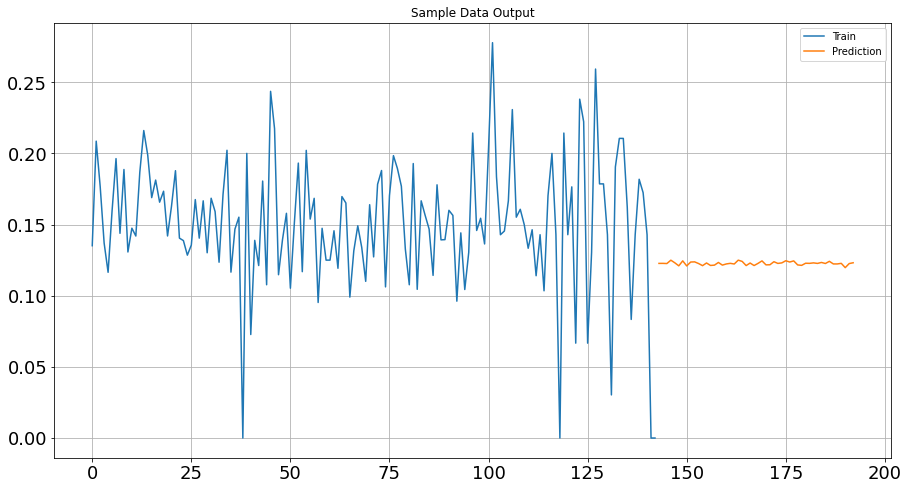

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from autots import AutoTS

model = model.import_template("model.csv", method='only')



predictions = model.predict()
forecast = predictions.forecast
print(forecast)
#forecast['DATE'] = pd.to_datetime(forecast['DATE'])

df['DELQ_ACCTS'].plot(figsize=(15,8), title= 'Sample Data Output', fontsize=18, label='Train')
forecast['DATE'] = forecast.index
forecast.index = range(len(df), len(forecast) + len(df))
forecast['DELQ_ACCTS'].plot(figsize=(15,8), title= 'Sample Data Output', fontsize=18, label='Prediction')
plt.legend()
plt.grid()
plt.show()